In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sqlite3

In [26]:
Hospital = pd.read_csv("https://raw.githubusercontent.com/itirkaa/Hospital-Anxiety-and-Depression/master/dataset/COPD_student_dataset.csv")

Hospital

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,10,68,25.0,MILD,511.0,575.0,575.0,2.70,98.0,...,35.84,2,1,1,2,0,1,0,0,0
97,98,43,75,40.0,MILD,576.0,577.0,577.0,2.90,93.0,...,15.05,3,1,1,2,0,1,0,0,1
98,99,74,68,30.0,MODERATE,468.0,582.0,582.0,1.65,67.0,...,19.70,2,2,0,2,0,0,1,0,0
99,100,108,54,30.0,SEVERE,688.0,699.0,699.0,1.72,44.0,...,20.55,1,3,1,2,0,0,0,0,0


In [27]:
Hospital.tail()

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
96,97,10,68,25.0,MILD,511.0,575.0,575.0,2.70,98.0,...,35.84,2,1,1,2,0,1,0,0,0
97,98,43,75,40.0,MILD,576.0,577.0,577.0,2.90,93.0,...,15.05,3,1,1,2,0,1,0,0,1
98,99,74,68,30.0,MODERATE,468.0,582.0,582.0,1.65,67.0,...,19.70,2,2,0,2,0,0,1,0,0
99,100,108,54,30.0,SEVERE,688.0,699.0,699.0,1.72,44.0,...,20.55,1,3,1,2,0,0,0,0,0
100,101,85,78,55.0,MODERATE,NaN,NaN,NaN,1.15,54.0,...,30.21,4,2,1,2,0,0,0,0,0


In [28]:
Hospital.describe()

,Unnamed: 0,ID,AGE,PackHistory,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
count,101.000000,101.000000,101.00000,101.000000,99.000000,100.000000,100.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,51.000000,91.405941,70.09901,39.698020,385.858586,390.280000,399.110000,1.603762,58.531485,2.954950,...,40.185842,2.475248,2.19802,0.643564,1.841584,0.207921,0.188119,0.118812,0.198020,0.089109
std,29.300171,51.516246,7.89874,24.558713,104.744199,107.754498,106.550116,0.672763,22.294821,0.976283,...,18.239268,1.109901,0.88340,0.481335,0.366952,0.407844,0.392756,0.325181,0.400495,0.286322
min,1.000000,1.000000,44.00000,1.000000,120.000000,120.000000,120.000000,0.450000,3.290000,1.140000,...,2.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,49.000000,65.00000,20.000000,300.000000,303.750000,303.750000,1.100000,42.000000,2.270000,...,28.410000,1.000000,2.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,87.000000,71.00000,36.000000,419.000000,399.000000,420.000000,1.600000,60.000000,2.770000,...,38.210000,3.000000,2.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,143.000000,75.00000,54.000000,460.500000,459.000000,465.250000,1.960000,75.000000,3.630000,...,55.230000,3.000000,3.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,101.000000,169.000000,88.00000,109.000000,688.000000,699.000000,699.000000,3.180000,102.000000,5.370000,...,77.440000,4.000000,4.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
Hospital.info

<bound method DataFrame.info of      Unnamed: 0   ID  AGE  PackHistory COPDSEVERITY   MWT1   MWT2  MWT1Best  \
0             1   58   77         60.0       SEVERE  120.0  120.0     120.0   
1             2   57   79         50.0     MODERATE  165.0  176.0     176.0   
2             3   62   80         11.0     MODERATE  201.0  180.0     201.0   
3             4  145   56         60.0  VERY SEVERE  210.0  210.0     210.0   
4             5  136   65         68.0       SEVERE  204.0  210.0     210.0   
..          ...  ...  ...          ...          ...    ...    ...       ...   
96           97   10   68         25.0         MILD  511.0  575.0     575.0   
97           98   43   75         40.0         MILD  576.0  577.0     577.0   
98           99   74   68         30.0     MODERATE  468.0  582.0     582.0   
99          100  108   54         30.0       SEVERE  688.0  699.0     699.0   
100         101   85   78         55.0     MODERATE    NaN    NaN       NaN   

     FEV1  FEV1PRED

In [30]:
Hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    101 non-null    int64  
 1   ID            101 non-null    int64  
 2   AGE           101 non-null    int64  
 3   PackHistory   101 non-null    float64
 4   COPDSEVERITY  101 non-null    object 
 5   MWT1          99 non-null     float64
 6   MWT2          100 non-null    float64
 7   MWT1Best      100 non-null    float64
 8   FEV1          101 non-null    float64
 9   FEV1PRED      101 non-null    float64
 10  FVC           101 non-null    float64
 11  FVCPRED       101 non-null    int64  
 12  CAT           101 non-null    int64  
 13  HAD           101 non-null    float64
 14  SGRQ          101 non-null    float64
 15  AGEquartiles  101 non-null    int64  
 16  copd          101 non-null    int64  
 17  gender        101 non-null    int64  
 18  smoking       101 non-null    

In [31]:
conn = sqlite3.connect("Hospital.db")
c = conn.cursor()

In [32]:
conn = sqlite3.connect("Hospital.db")
c = conn.cursor()

In [33]:
Hospital.to_sql("Hospital", conn, if_exists='replace')

/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2653: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [34]:
#See data
c.execute("""SELECT * FROM Hospital""")
rows = c.fetchall()
rows

[(0,
  1,
  58,
  77,
  60.0,
  'SEVERE',
  120.0,
  120.0,
  120.0,
  1.21,
  36.0,
  2.4,
  98,
  25,
  8.0,
  69.55,
  4,
  3,
  1,
  2,
  1,
  0,
  0,
  1,
  0),
 (1,
  2,
  57,
  79,
  50.0,
  'MODERATE',
  165.0,
  176.0,
  176.0,
  1.09,
  56.0,
  1.64,
  65,
  12,
  21.0,
  44.24,
  4,
  2,
  0,
  2,
  1,
  0,
  0,
  1,
  1),
 (2,
  3,
  62,
  80,
  11.0,
  'MODERATE',
  201.0,
  180.0,
  201.0,
  1.52,
  68.0,
  2.3,
  86,
  22,
  18.0,
  44.09,
  4,
  2,
  0,
  2,
  1,
  0,
  0,
  1,
  0),
 (3,
  4,
  145,
  56,
  60.0,
  'VERY SEVERE',
  210.0,
  210.0,
  210.0,
  0.47,
  14.0,
  1.14,
  27,
  28,
  26.0,
  62.04,
  1,
  4,
  1,
  2,
  0,
  0,
  1,
  1,
  0),
 (4,
  5,
  136,
  65,
  68.0,
  'SEVERE',
  204.0,
  210.0,
  210.0,
  1.07,
  42.0,
  2.91,
  98,
  32,
  18.0,
  75.56,
  1,
  3,
  1,
  2,
  0,
  1,
  1,
  0,
  0),
 (5,
  6,
  84,
  67,
  26.0,
  'MODERATE',
  216.0,
  180.0,
  216.0,
  1.09,
  50.0,
  1.99,
  60,
  29,
  21.0,
  73.82,
  2,
  2,
  0,
  1,
  1,
  0

In [35]:
Hospital.to_excel("Hospital.xls")

pd.read_excel("Hospital.xls")

,Unnamed: 0,Unnamed: 0.1,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,...,69.55,4,3,1,2,1,0,0,1,0
1,1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,...,44.24,4,2,0,2,1,0,0,1,1
2,2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,...,44.09,4,2,0,2,1,0,0,1,0
3,3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,...,62.04,1,4,1,2,0,0,1,1,0
4,4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,...,75.56,1,3,1,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,97,10,68,25.0,MILD,511.0,575.0,575.0,2.70,...,35.84,2,1,1,2,0,1,0,0,0
97,97,98,43,75,40.0,MILD,576.0,577.0,577.0,2.90,...,15.05,3,1,1,2,0,1,0,0,1
98,98,99,74,68,30.0,MODERATE,468.0,582.0,582.0,1.65,...,19.70,2,2,0,2,0,0,1,0,0
99,99,100,108,54,30.0,SEVERE,688.0,699.0,699.0,1.72,...,20.55,1,3,1,2,0,0,0,0,0


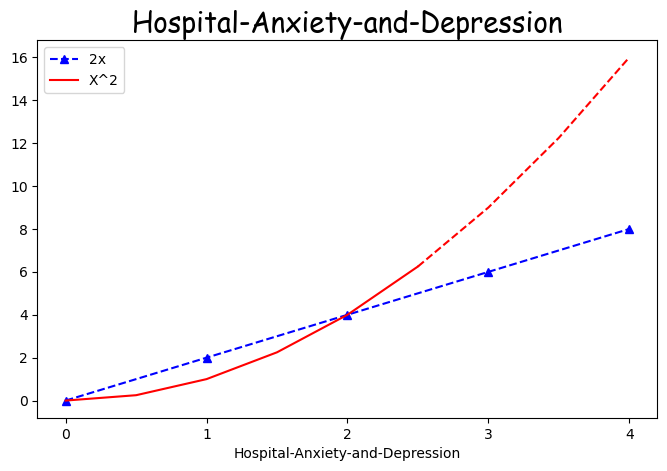

In [36]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Hospital-Anxiety-and-Depression', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Hospital-Anxiety-and-Depression')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()